In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
categorical_columns = train_df.select_dtypes('object').columns
numerical_columns = train_df.select_dtypes('int').columns

In [4]:
train_df[numerical_columns].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [5]:
train_df[categorical_columns].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

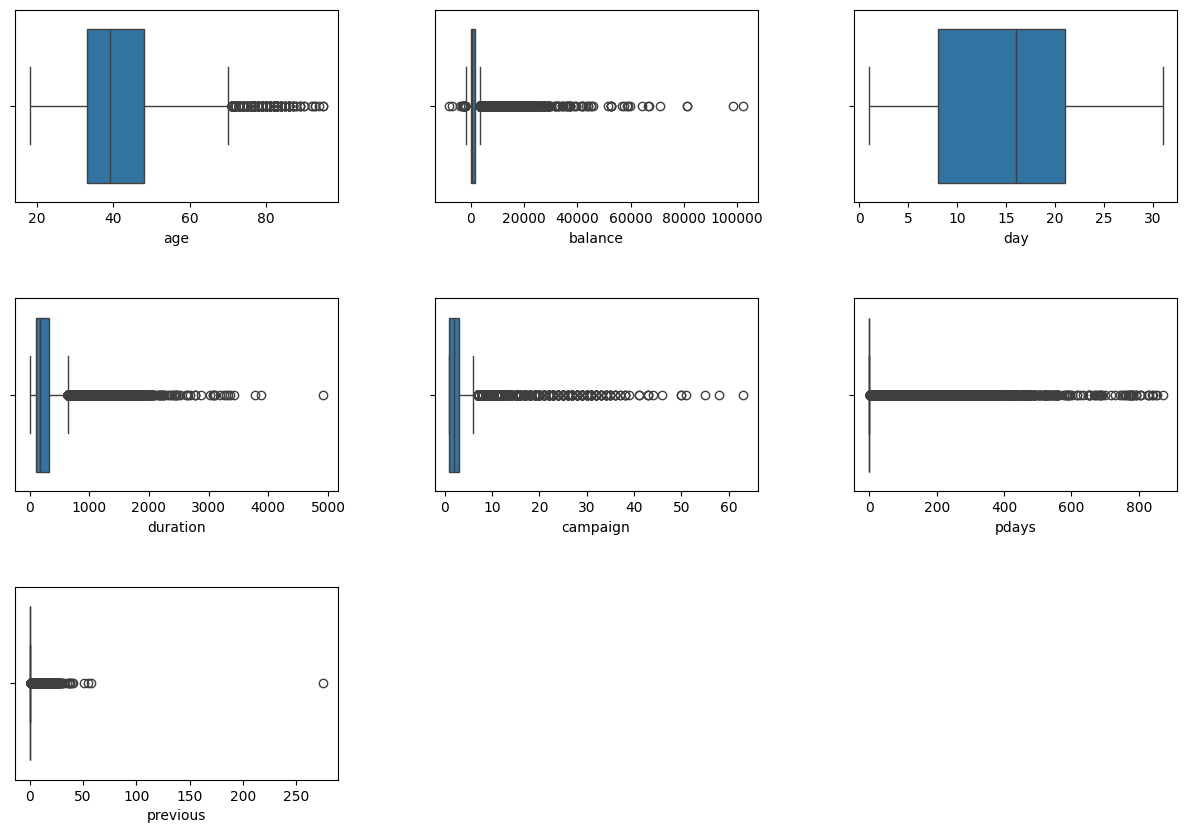

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for idx,column in enumerate(numerical_columns):
    plt.subplot(3,3,idx+1)
    sns.boxplot(train_df[column],orient='h')
    plt.xlabel(column)

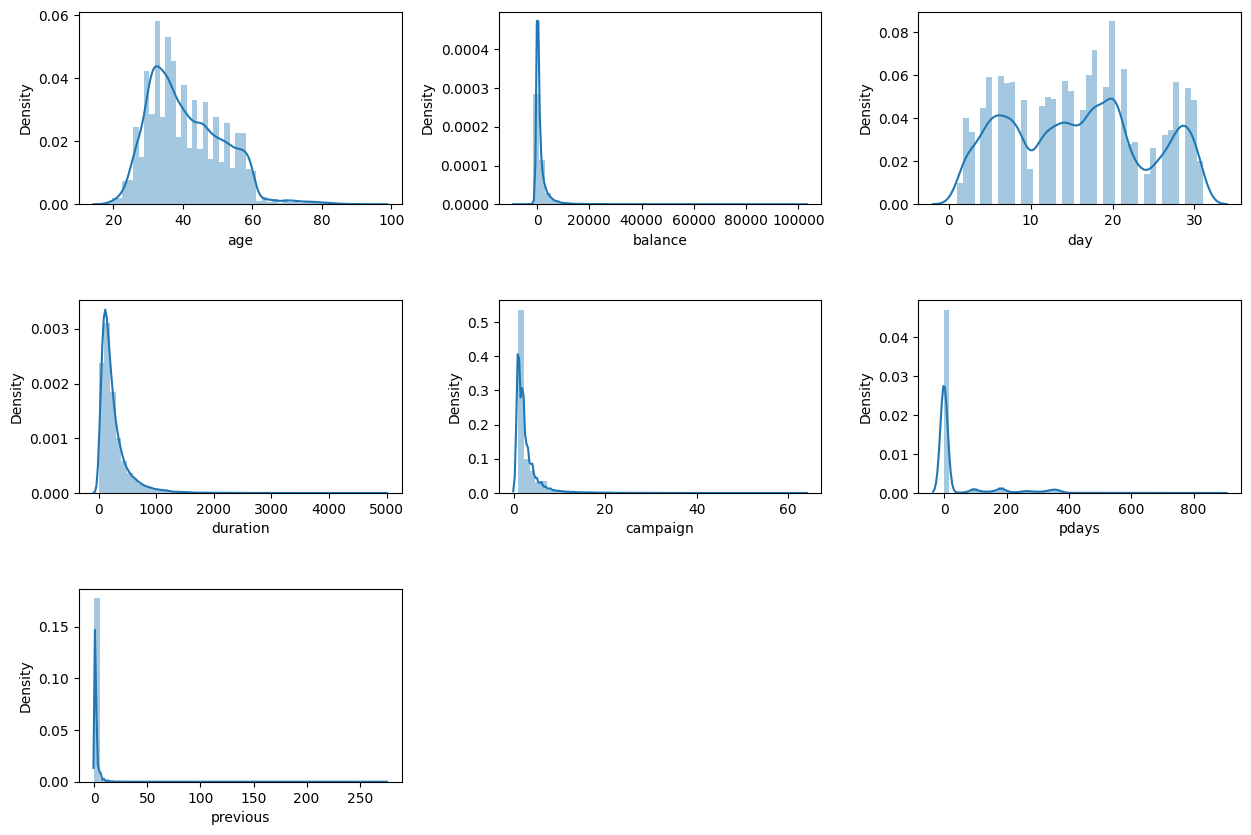

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for idx,column in enumerate(numerical_columns):
    plt.subplot(3,3,idx+1)
    sns.distplot(train_df[column])
    plt.xlabel(column)

In [8]:
train_df[numerical_columns].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

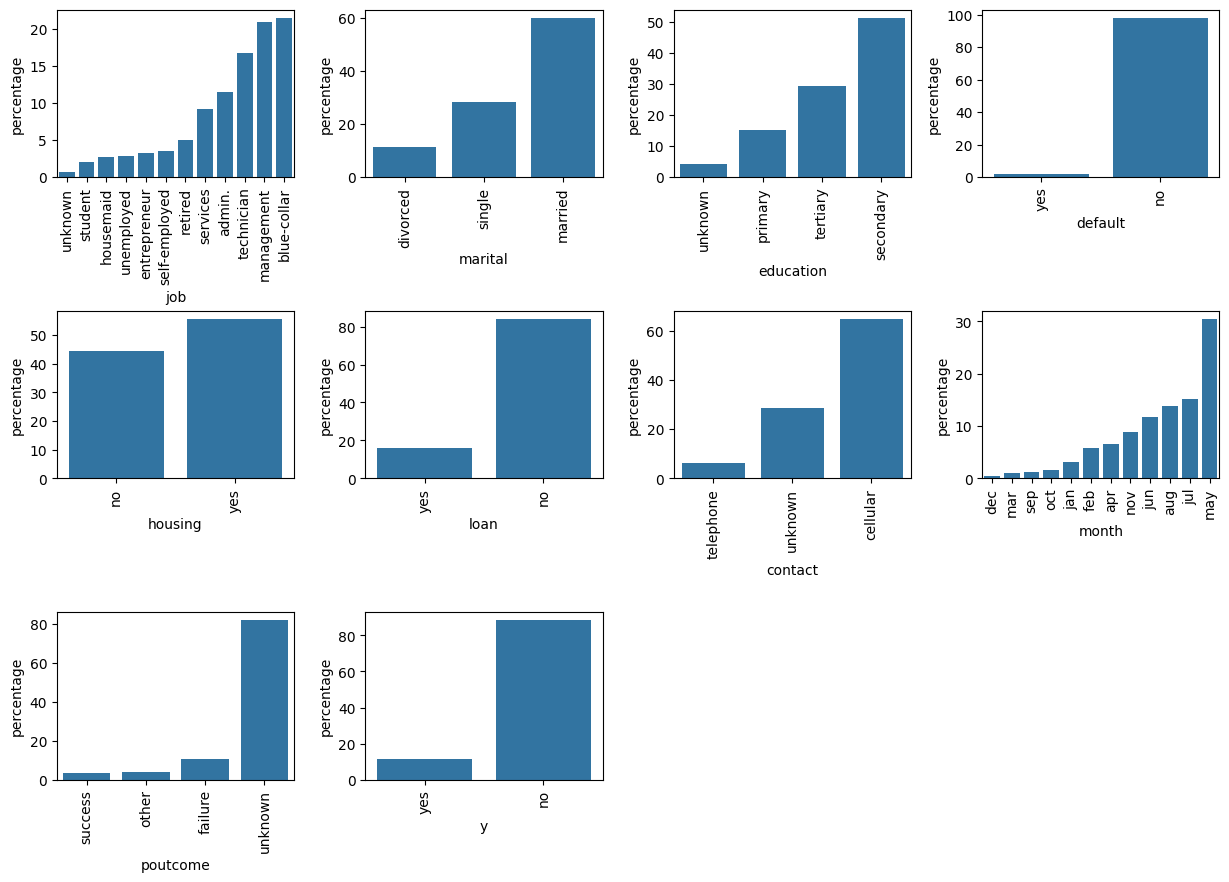

In [9]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.8)
for idx,column in enumerate(categorical_columns):
    plt.subplot(3,4,idx+1)
    temp_data = pd.crosstab(index = train_df[column],columns='Frequency',normalize=True)*100
    temp_data = temp_data.sort_values(by='Frequency')
    sns.barplot(data = temp_data,x = temp_data.index,y = 'Frequency')
    plt.xlabel(column)
    plt.ylabel("percentage")
    plt.xticks(rotation=90)


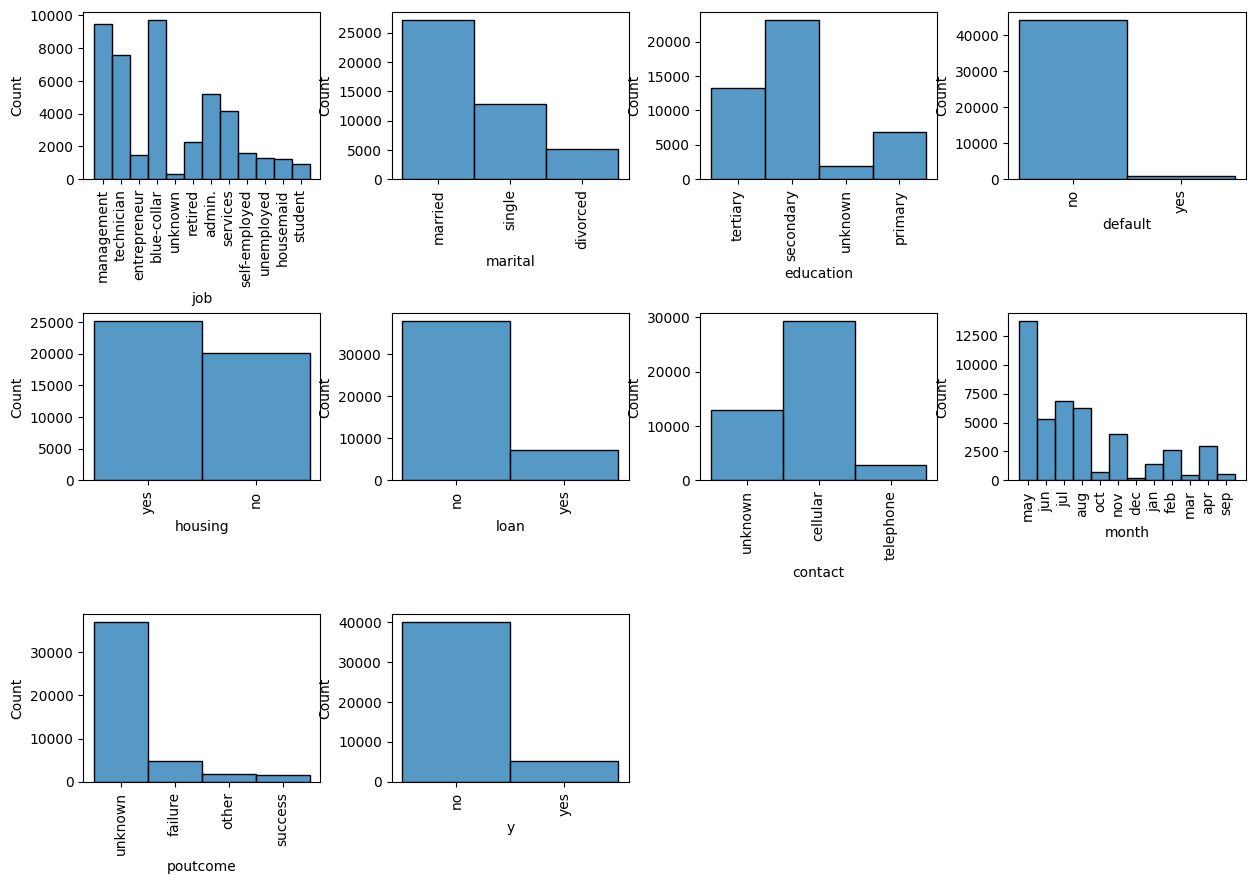

In [10]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.8)
for idx,column in enumerate(categorical_columns):
    plt.subplot(3,4,idx+1)
    sns.histplot(train_df[column])
    plt.xlabel(column)
    plt.xticks(rotation=90)

##### Univariate Analysis after Data Cleaning Step

In [23]:
cleaned_df = pd.read_csv("../artifacts/cleaned data/cleaned.csv")
cleaned_df.head()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,may,198,1,0,unknown,no


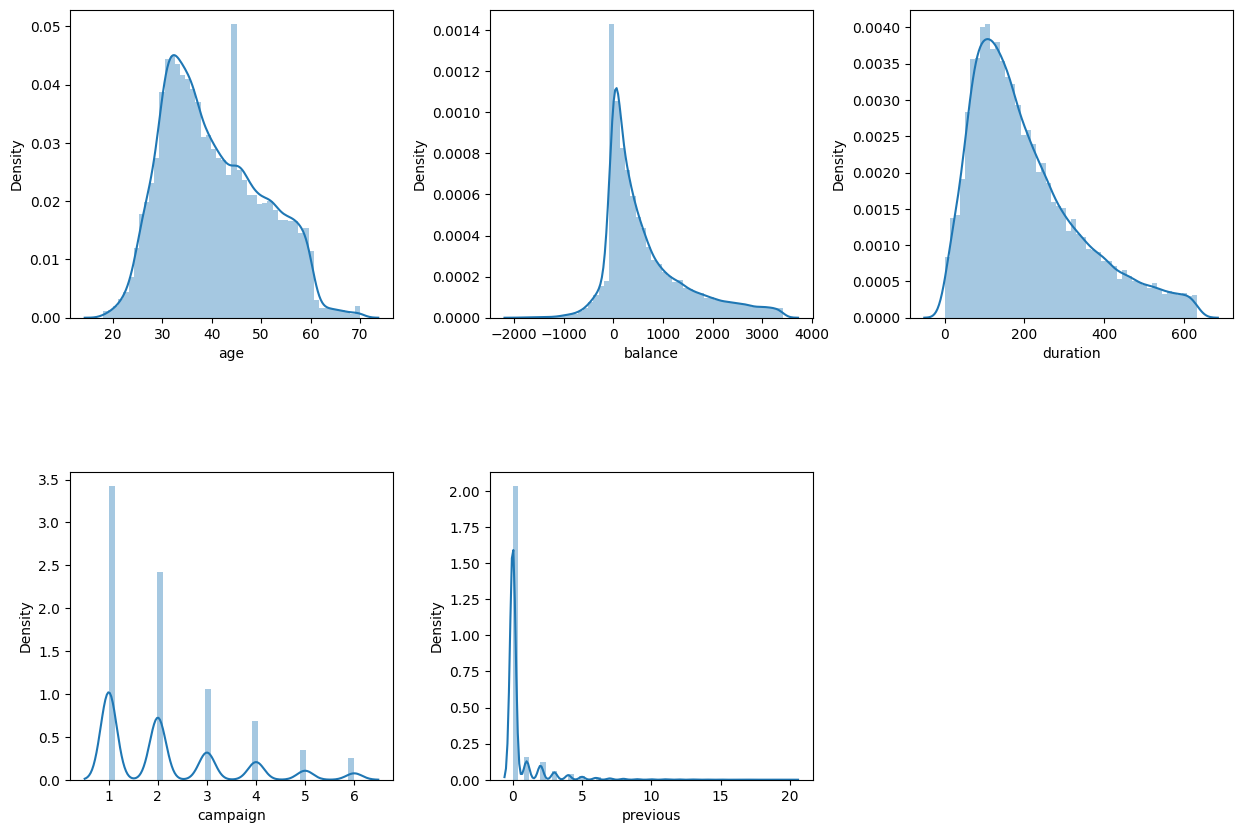

In [24]:
numerical_columns = cleaned_df.select_dtypes('int').columns

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for idx,column in enumerate(numerical_columns):
    plt.subplot(2,3,idx+1)
    sns.distplot(cleaned_df[column])
    plt.xlabel(column)


In [25]:
cleaned_df[numerical_columns].skew()

age         0.430570
balance     1.294298
duration    1.004477
campaign    1.224059
previous    4.853808
dtype: float64